# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Data Validation
The dataset contain the information of food claims process on a fast food chain in Brazil with over 200 outlets

There are **2000** rows and **9 columns** in the data. There were two columns: **linked cases** and **amount paid**, both of which were have missing values. I substitute the missing value for **amount paid** with the column's overall **median** in accordance with the instruction and I replace the missing value for **linked cases** columns with **False**.Because I only **replaced** the **missing value** instead of **removing** it, the number of rows in the data did not drop.

- **time_to_close** range from 76 to 518 days
- **claim_amount** range from 1637 to 76106. There were currency character placed in front of the value., we should remove that later to ease our analysis
- There were 4 unique location, as expected
- The number of **claimants** ranges from 1 to 15. As expected, there are no **negative** or **zero** values.
- There are 2 **linked_cases** - **True/False**, as expected.
- There were 3 type of **claim cause** (“vegetable”, “meat”, and “unknown”.), as expected

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Task 1



### a. State whether the values match the description

In [2]:
df = pd.read_csv('food_claims_2212.csv')
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


- Column **claim_amount** does not match the description. According to the description, the column's data type should be **continuous**, yet its value indicates that the claim values are preceded by a **currency symbol**

### b. State the number of missing values in the column.

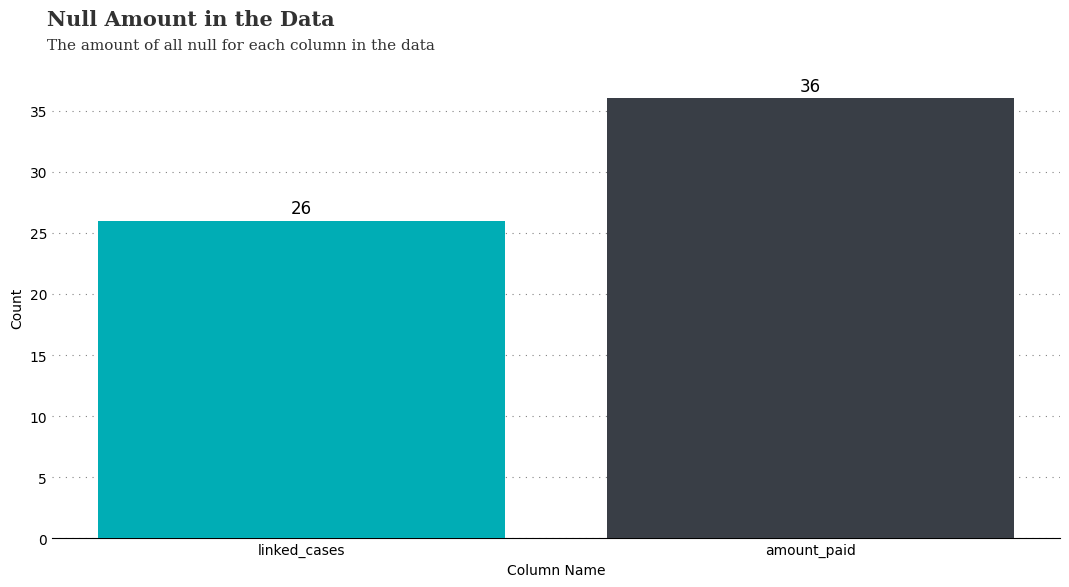

In [3]:
df_Null = df.isna().sum().sort_values()
df_Null.drop(df_Null.loc[df_Null == 0].index, inplace=True)

fig, ax = plt.subplots(figsize=(13, 6), dpi=100)


x = np.arange(1, len(df_Null)+1)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
ax.bar(x, height=df_Null, color=["#00ADB5", '#393E46'], zorder=3)
ax.set_xticks(x)
ax.set_xticklabels(df_Null.index)

ax.set_ylabel('Count')
ax.set_xlabel('Column Name')

ax.text(0.5, 42, 'Null Amount in the Data', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")
ax.text(0.5, 40, 'The amount of all null for each column in the data', fontsize=11,
        fontweight='light', fontfamily='serif', color="#323232")

for i, j in enumerate(df_Null):
    ax.annotate(f'{j}', xy=(i+1, j+1), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)

- There were **2 columns** that has null values in it. Which is **liked_cases** and **amount_paid** column
- **amount_paid** column has higher null amount than linked_cases column

Here is what happened when I replaced it

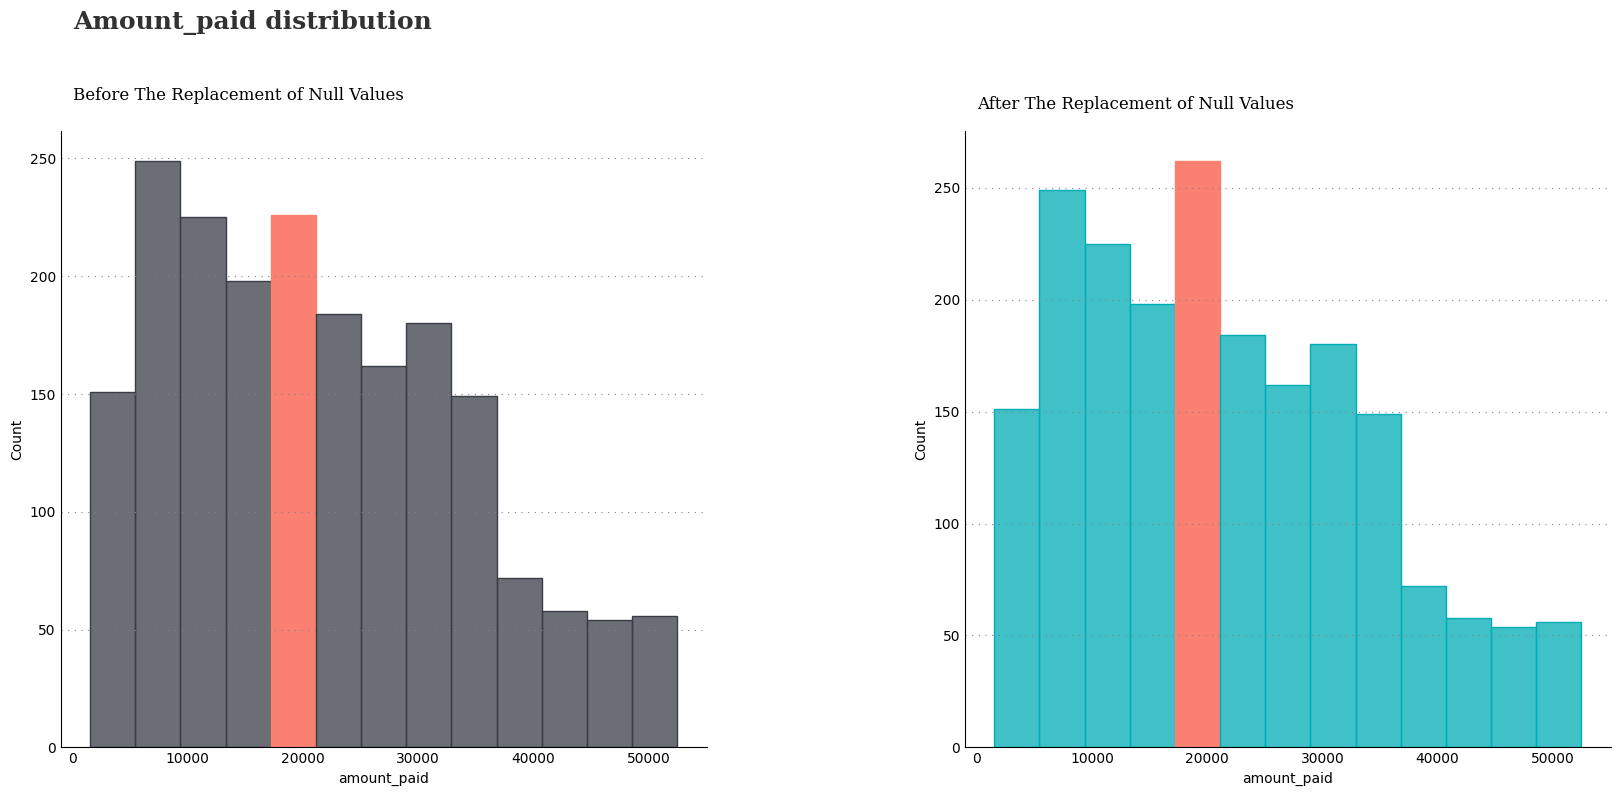

In [4]:
fig = plt.figure(figsize=(20, 8), dpi=100)

palette = ["#00ADB5", '#393E46']

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


# AX0 (Histogram before null replace)
ax0.text(1, 305, 'Amount_paid distribution', fontsize=18,
         fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(1, 275, 'Before The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
ax0.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
hist1 = sns.histplot(data=df, x="amount_paid", ax=ax0,
             color=palette[1],  bins=13, edgecolor=palette[1])
hist1.patches[4].set_facecolor('salmon')
hist1.patches[4].set_edgecolor('salmon')


# AX1 (Histogram after null replace)
ax1.text(1, 285, 'After The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
# Replace Null
df['amount_paid'].fillna(df['amount_paid'].median(), inplace=True)
ax1.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
hist2 = sns.histplot(data=df, x="amount_paid", ax=ax1,
             color=palette[0],  bins=13, edgecolor=palette[0])
hist2.patches[4].set_facecolor('salmon')
hist2.patches[4].set_edgecolor('salmon')


for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))

locals()["ax"].tick_params(length=0)


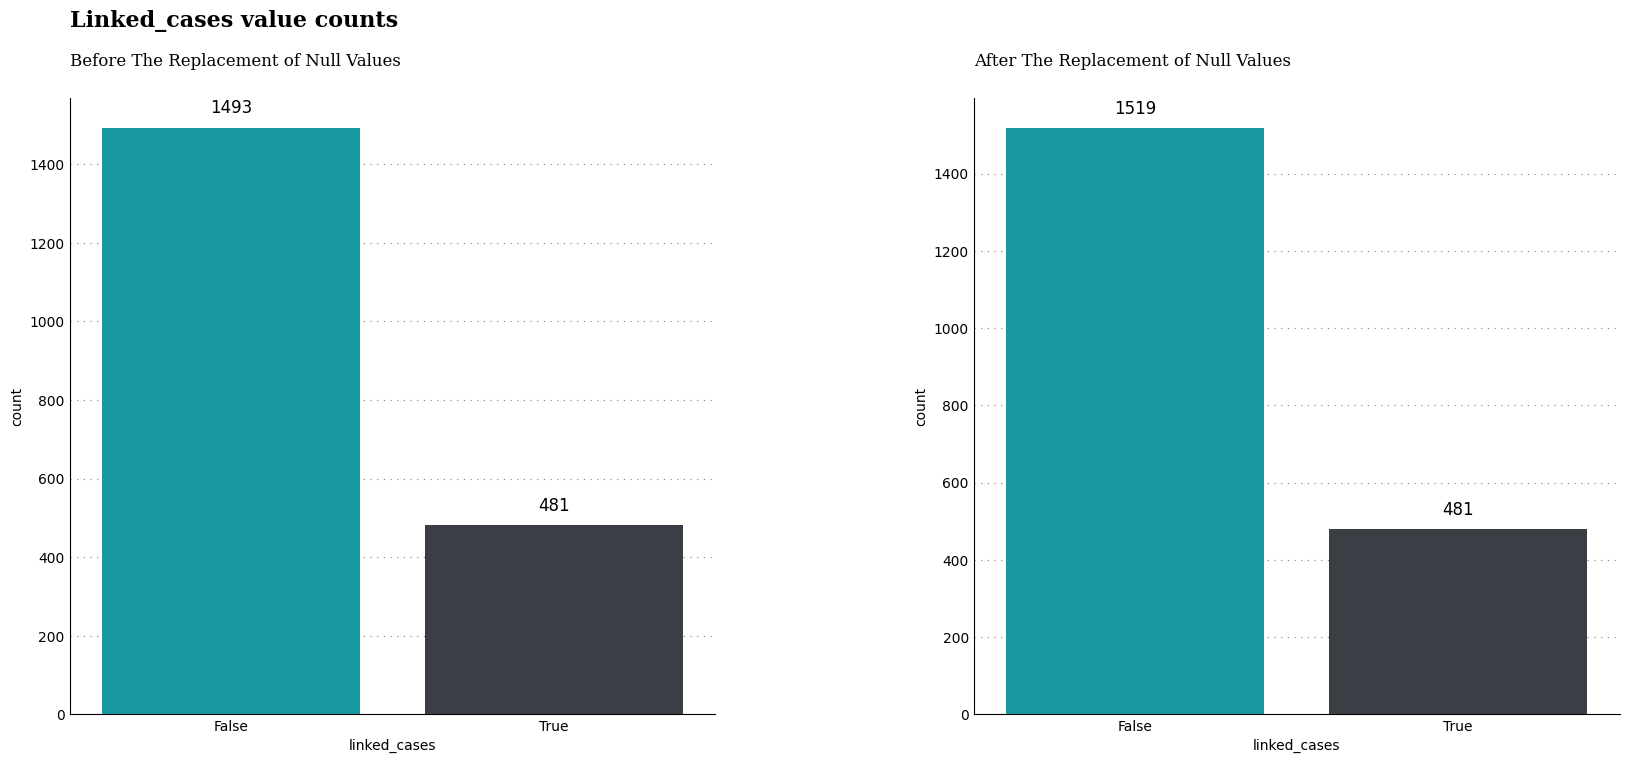

In [5]:
fig = plt.figure(figsize=(20, 8), dpi=100)


palette = ["#00ADB5", '#393E46']

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.text(-0.5, 1750, 'Linked_cases value counts',
         fontfamily='serif', fontsize=16, fontweight='bold')

# AX0 (Countplot before null replace)
ax0.text(-0.5, 1650, 'Before The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
sns.countplot(x=df['linked_cases'],ax=ax0,palette=palette,zorder=3)

for i, j in enumerate(df['linked_cases'].value_counts()):
    ax0.annotate(f'{j}', xy=(i, j+50), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

# AX1 (Countplot after null replace)
# Replace Null
df['linked_cases'].fillna(df['linked_cases'][0], inplace=True)

ax0.text(2.3, 1650, 'After The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
for i, j in enumerate(df['linked_cases'].value_counts()):
    ax1.annotate(f'{j}', xy=(i, j+50), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

ax1.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
sns.countplot(x=df['linked_cases'],ax=ax1,palette=palette,zorder=3)



for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))

locals()["ax"].tick_params(length=0)


### c. Describe what you did to make values match the description if they did not match.

- **number_of_claims** : Remove the currency from front of the values so that the column simply contains digit numbers

In [6]:
df['claim_amount'] = df['claim_amount'].str.replace('$', '')
df['claim_amount'] = df['claim_amount'].str.replace('R', '')
df['claim_amount'] = df['claim_amount'].astype(float)

## Task 2

### a.State which category of the variable location has the most observations

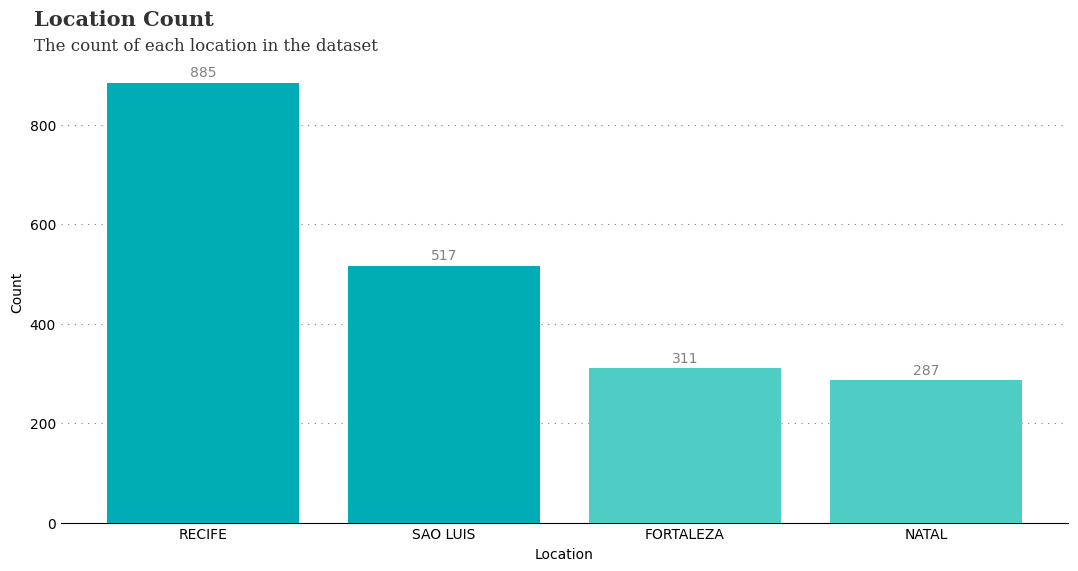

In [7]:
dfLoc = df['location'].value_counts()

fig, ax = plt.subplots(figsize=(13, 6), dpi=100)

x = np.arange(1, len(dfLoc)+1)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
ax.bar(x, height=dfLoc, zorder=3,color = ['#00ADB5','#00ADB5','#4ECDC4','#4ECDC4'])
ax.set_xticks(x)
ax.set_xticklabels(dfLoc.index)

ax.set_ylabel('Count')
ax.set_xlabel('Location')

ax.text(0.3, 1000, 'Location Count', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")
ax.text(0.3, 950, 'The count of each location in the dataset', fontsize=12,
        fontweight='light', fontfamily='serif', color="#323232")

for i, j in enumerate(dfLoc):
    ax.annotate(f'{j}', xy=(i+1, j+20), color='gray',
                horizontalalignment='center', verticalalignment='center', fontsize=10)

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)

- **Bar chart** used to compare each **location** that is appear in the dataset
- **RECIFE** is the location that has the most observation followed by Sao Luis based on the graph that showed above

### b. Explain whether the observations are balanced across categories of the variable location

- The observation can be callled **balance** if all the categories have the same proportion between each other.
- From the bar chart above, it is already clear that the amount of location for each category is inbalance.
- For easier perspective to compare the proportion of each category, we can visualize it using pie chart

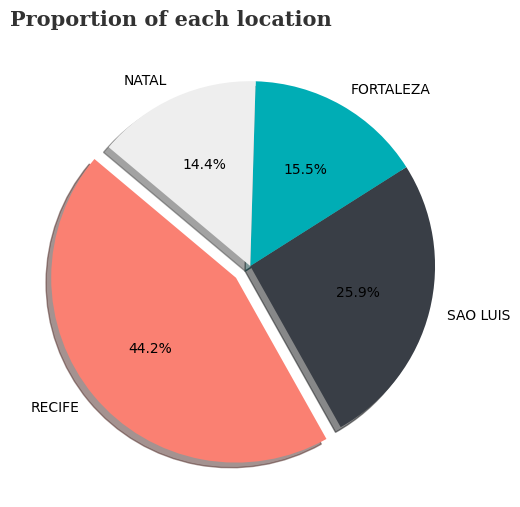

In [8]:
dfLoc = df['location'].value_counts()

fig, ax = plt.subplots(figsize=(13, 6), dpi=100)

ax.pie(dfLoc, explode=(0.1, 0, 0, 0), labels=dfLoc.index,colors=['salmon','#393E46','#00ADB5','#EEEEEE'],
autopct='%1.1f%%', shadow=True, startangle=140)

ax.text(-1.3, 1.3, 'Proportion of each location', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")
plt.show()

- Each location should've around 25% of the total observation to can be called balance
- But **RECIFE** itself already took 44.2% of the total observation in the data
- So we can conclude that the location is not balance for each categories in the data

## Task 3

### Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

- Histogram or boxplot is a common and effective visual representation to explain the distribution of an univariate variable.
- With histogram or boxplot, we can describe shape, center, spread, skewness, and any distinctive features, such as outliers from the data. 

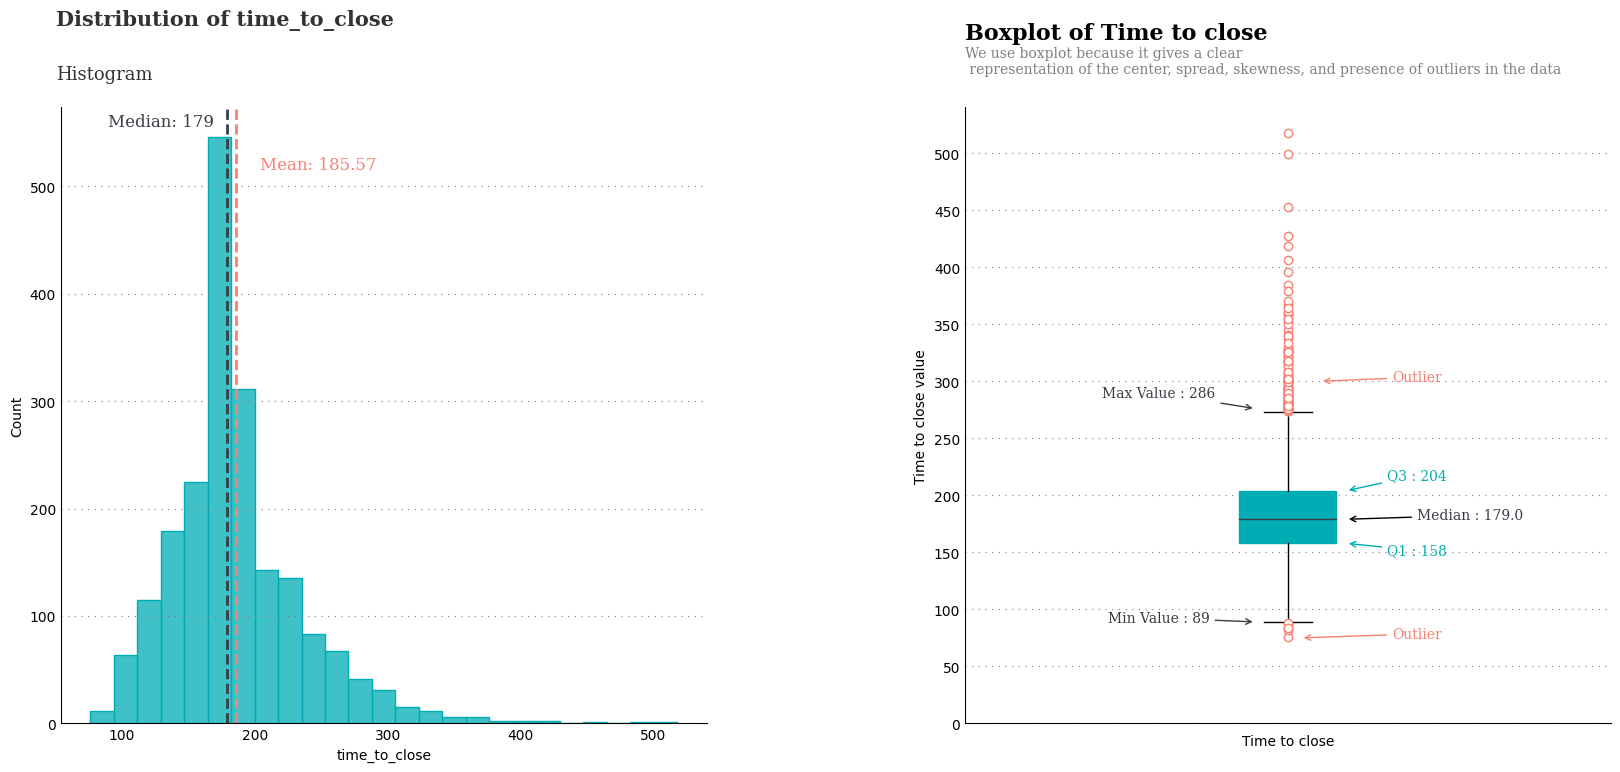

In [9]:
fig = plt.figure(figsize=(20, 8), dpi=100)

palette = ["#00ADB5", '#393E46']

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


ax0.text(50, 650, 'Distribution of time_to_close', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")

ax0.text(50, 600, 'Histogram', fontsize=13,
        fontweight='light', fontfamily='serif', color="#323232")

ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
sns.histplot(data=df, x="time_to_close",
             color=palette[0],   edgecolor=palette[0],bins=25,ax=ax0)

ax0.axvline(df['time_to_close'].mean(), color='salmon', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = ax0.get_ylim()
ax0.text(df['time_to_close'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['time_to_close'].mean()),color='salmon',fontsize=12,fontweight='light', fontfamily='serif')


ax0.axvline(df['time_to_close'].median(), linestyle='dashed', linewidth=2,color='#393E46')
min_ylim, max_ylim = ax0.get_ylim()
ax0.text(df['time_to_close'].median()*0.5, max_ylim*0.97, 'Median: {:.0f}'.format(df['time_to_close'].median()),color='#393E46',fontsize=12,fontweight='light', fontfamily='serif')

yticks =np.arange(0,550,50)

ax1.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
box = ax1.boxplot(df['time_to_close'], patch_artist=True,
                 boxprops=dict(facecolor="#00ADB5", color="#00ADB5"),
                 flierprops=dict(markerfacecolor='w',
                                 markeredgecolor='salmon'),
                 medianprops=dict(color='#393E46'))
ax1.set_xticklabels([])
ax1.set_yticks(yticks)

ax1.text(0.5, 600, 'Boxplot of Time to close',
        fontfamily='serif', fontsize=16, fontweight='bold')
ax1.text(0.5, 570, 'We use boxplot because it gives a clear \n representation of the center, spread, skewness, and presence of outliers in the data',
        fontfamily='serif', fontsize=10, fontweight='light',color='grey')

ax1.set_ylabel('Time to close value')
ax1.set_xlabel('Time to close')

medians = [item.get_ydata()[0] for item in box['medians']]
ax1.annotate(f'Median : {medians[0]}', xy=(1.09, medians[0]), xytext=(1.2, medians[0]),
             arrowprops={'arrowstyle': '->'}, fontsize=10, color='#393E46', fontweight='light', fontfamily='serif')

# IQR
ax1.annotate(f'Q1 : {158}', xy=(1.09, 158), xytext=(1.2, 148),
             arrowprops={'arrowstyle': '->', "color": "#00ADB5"}, horizontalalignment='center', fontsize=10, color="#00ADB5", fontweight='light', fontfamily='serif')
ax1.annotate(f'Q3 : {204}', xy=(1.09, 204), xytext=(1.2, 204+10),
             arrowprops={'arrowstyle': '->', "color": "#00ADB5"}, horizontalalignment='center', fontsize=10, color="#00ADB5", fontweight='light', fontfamily='serif')

#OUTLIER
ax1.annotate(f'Outlier', xy=(1.05, 300), xytext=(1.2, 300),
             arrowprops={'arrowstyle': '->', "color": "salmon"}, horizontalalignment='center', fontsize=10, color="salmon", fontweight='light', fontfamily='serif')
ax1.annotate(f'Outlier', xy=(1.02, 75), xytext=(1.2, 75),
             arrowprops={'arrowstyle': '->', "color": "salmon"}, horizontalalignment='center', fontsize=10, color="salmon", fontweight='light', fontfamily='serif')

#MAX - MIN
ax1.annotate(f'Max Value : 286', xy=(0.95, 276), xytext=(0.8, 286),
             arrowprops={'arrowstyle': '->', "color": "#393E46"}, horizontalalignment='center', fontsize=10, color="#393E46", fontweight='light', fontfamily='serif')
ax1.annotate(f'Min Value : 89', xy=(0.95, 89), xytext=(0.8, 89),
             arrowprops={'arrowstyle': '->', "color": "#393E46"}, horizontalalignment='center', fontsize=10, color="#393E46", fontweight='light', fontfamily='serif')

for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))
locals()["ax"].tick_params(length=0)

- The distribution reveals that the majority of the claims fall between 158 and 204 days. 
- Any claims that require more than 286 days to be resolved can be regarded as outliers.
- There are plenty of claims that are solved after 286 days.
- The legal team should pay attention to the location that has many claim to be closed after or around 286 days 

## Task 4

### Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

- We can employ a variety of statistical techniques and visual representations to explain the link between a categorical and a numerical variable.
- We can use either a Barplot or a Boxplot for visualizations since they allow us to compare any data between each group.

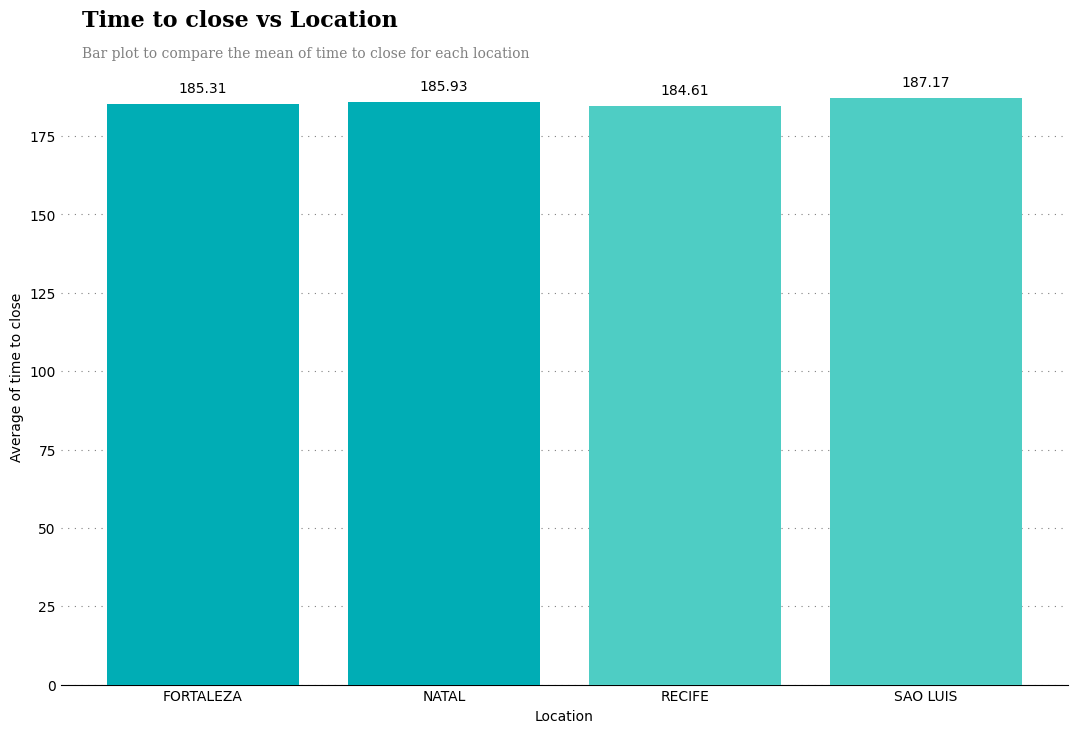

In [10]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=100)

colors = ['#00ADB5','#00ADB5','#4ECDC4','#4ECDC4']


ax.text(0.5, 210, 'Time to close vs Location',
        fontfamily='serif', fontsize=16, fontweight='bold')
ax.text(0.5, 200, 'Bar plot to compare the mean of time to close for each location',
        fontfamily='serif', fontsize=10, fontweight='light',color='grey')

dflocgroup = df.groupby('location')['time_to_close'].mean()
x = np.arange(1, len(dflocgroup)+1)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',dashes=(1, 5))
ax.bar(x, height=dflocgroup, zorder=3,color=colors)
ax.set_xticks(x)
ax.set_xticklabels(dflocgroup.index)

ax.set_ylabel('Average of time to close')
ax.set_xlabel('Location')


for i, j in enumerate(dflocgroup):
    ax.annotate(f'{j:.2f}', xy=(i+1, j+5), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=10,fontweight='light')

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)

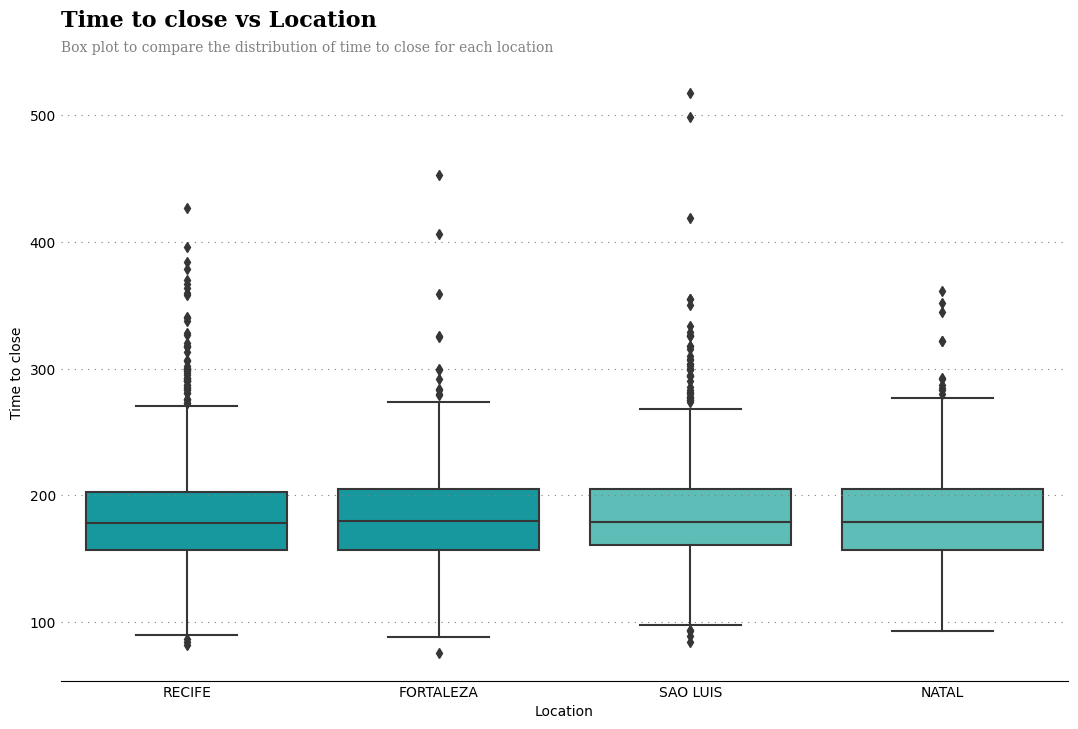

In [11]:
fig, ax = plt.subplots(figsize=(13, 8), dpi=100)


colors = ['#00ADB5','#00ADB5','#4ECDC4','#4ECDC4']

ax.text(-0.5, 570, 'Time to close vs Location',
        fontfamily='serif', fontsize=16, fontweight='bold')
ax.text(-0.5, 550, 'Box plot to compare the distribution of time to close for each location',
        fontfamily='serif', fontsize=10, fontweight='light',color='grey')

dflocgroup = df.groupby('location')['time_to_close'].mean()

ax.grid(color='gray', linestyle=':', zorder=0, axis='y',dashes=(1, 5))
sns.boxplot(data=df,x='location',y='time_to_close',palette=colors)


ax.set_ylabel('Time to close')
ax.set_xlabel('Location')



for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)

- Pay attention to Sao Luis because it has the highest average time for claims to be resolved.
- There are numerous high outliers or resolved claims after 286 days in Recife and Sao Luis. With Sao Luis has the longest case of claim to be closed
- Given the little amount of high outliers in that location, Natal can be considered the location that performs the best at resolving claims followed by Fortaleza. However, given that Natal and Fortaleza have the fewest locations in the data, this might happen.

### Summary
- Based on all the observations that have been done above, i would recommend The legal team evaluate any claim processes that occur in locations that have high time for claims to be resolved like Recife and Sao Luis
- Although Natal and Fortaleza may currently be the locations that do the best at resolving claims, those two locations also have the fewest observations in the data. Any claim that takes a long time to resolve could occur in the future, so further research needs to be done.
- I would also strongly advise the legal team to conduct additional research into other factors, such as claimants, the amount to be paid, and the sources of the claims, that could influence when a claim will be resolved.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam